In [14]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

from  sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

iris = load_iris()
x, y = iris.data, iris.target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
depth = 1
f1 = 0

while f1 < 0.82:
    clf = DecisionTreeClassifier(class_weight='balanced', min_samples_split=32, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f1)
    print(depth)
    depth+=1

0.7105263157894737
1
0.9210526315789473
2


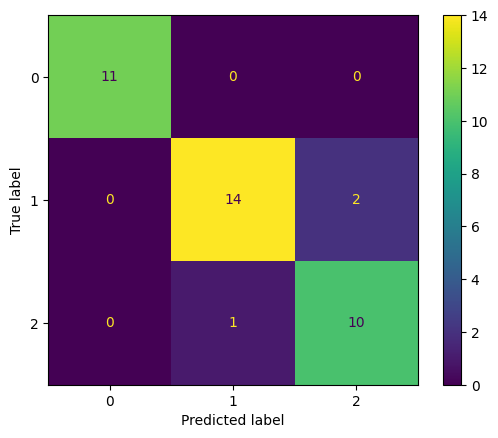

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()